<a href="https://colab.research.google.com/github/YahyaEryani/quantum-model/blob/main/notebooks/03_HGB_Training_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training, Tuning, and Evaluation

 In this notebook, we will train an histogram gradient boosted classifier model on the Higgs boson dataset we have preprocessed in the `01_data_exploration` notebook. We will perform the model training and tuning process to obtain the best model with the highest accuracy possible.

## Importing Libraries
In this section, we will import the necessary libraries and packages that will be used throughout the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score, f1_score

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Loading Data

This code cell loads the training, validation, and test datasets that were saved in pickle format to the local directory.

In [2]:
# Mount Google Drive in Colab
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load data from Google Drive
train_path = '/content/drive/MyDrive/Higgs_dataset/processed/training_data.pkl'
val_path   = '/content/drive/MyDrive/Higgs_dataset/processed/validation_data.pkl'
test_path  = '/content/drive/MyDrive/Higgs_dataset/processed/testing_data.pkl'

train_data = pd.read_pickle(train_path)
val_data = pd.read_pickle(val_path)
test_data = pd.read_pickle(test_path)

Mounted at /content/drive


## Prepare the data for training
This code separates the features and class labels from the train, validation, and test datasets.

In [3]:
# Separate features and labels
y_train = train_data['class_label']
X_train = train_data.drop('class_label', axis=1)
y_val = val_data['class_label']
X_val = val_data.drop('class_label', axis=1)
y_test = test_data['class_label']
X_test = test_data.drop('class_label', axis=1)


##Train the Histogram Gradient Boosting Classifier model
This code sets the hyperparameters for a Histogram Gradient Boosting Classifier model, including the maximum depth of trees, learning rate, maximum number of leaf nodes, and loss function. It then trains the Histogram Gradient Boosting Classifier model using early stopping and a specified number of iterations.

In [4]:
# Set the hyperparameters for the Histogram Gradient Boosting Classifier model
hist_gradient_boosting = HistGradientBoostingClassifier(
    loss='log_loss',
    learning_rate=0.05,  # Lower learning rate for more stable convergence
    max_iter=200,  # Increase the number of iterations for improved performance
    max_leaf_nodes=31,  # Keep the same
    max_depth=None,  # Keep the same
    min_samples_leaf=30,  # Slightly increase to reduce overfitting
    l2_regularization=0.1,  # Add a small amount of regularization to prevent overfitting
    random_state=42,
)


# Train the model
history = hist_gradient_boosting.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = hist_gradient_boosting.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the validation set (optional)
y_val_pred = hist_gradient_boosting.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Training Accuracy: 73.66%
Validation Accuracy: 73.11%


# Model Evaluation

## Make predictions on the test data and evaluate the model performance
This code uses the Histogram Gradient Boosting Classifier model that was previously trained to make predictions on the test data.

In [5]:
# Make predictions on the test set
y_pred = hist_gradient_boosting.predict(X_test)

# Calculate the AUC of the model
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.2f}")

# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

AUC: 0.73
F1 Score: 0.75
Accuracy: 73.10%


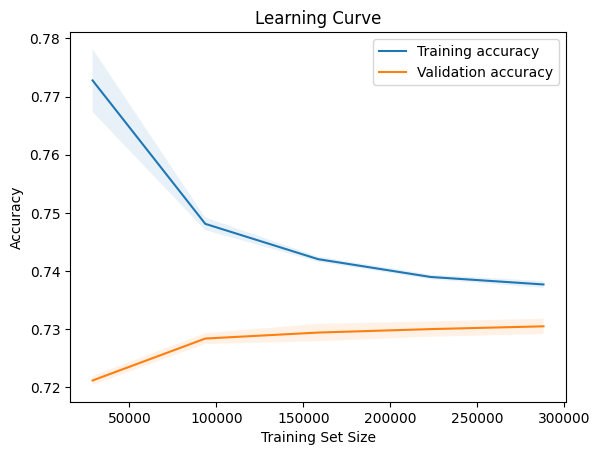

In [25]:
# Get the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    hist_gradient_boosting, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate the mean and standard deviation for train_scores and val_scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training accuracy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label="Validation accuracy")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()